In [1]:
import numpy as np 
import pandas as pd
import matplotlib .pyplot as plt
import seaborn as sns
%matplotlib inline
import os 
import opendatasets as od


In [2]:
od.download("https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge")


Skipping, found downloaded files in ".\car-price-prediction-challenge" (use force=True to force download)


In [3]:
df=pd.read_csv("car-price-prediction-challenge/car_price_prediction.csv")
df.head(5)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [5]:
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [6]:
df.shape

(19237, 18)

In [7]:
df.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df=df.drop(["Model","ID"],axis=1)

In [10]:
#categoricail columns ==> Manufacturer| fuelType | category | GearBoxType | Wheel | Color | Doors | Drive wheels |leather interior | prod.year
#Numerical columns ==> Price | Levy | Millage | Cylinder | Airbags


In [11]:
df["Levy"]=pd.to_numeric(df["Levy"],errors='coerce')
df["Levy"].replace("-",df["Levy"].mean(),inplace=True)

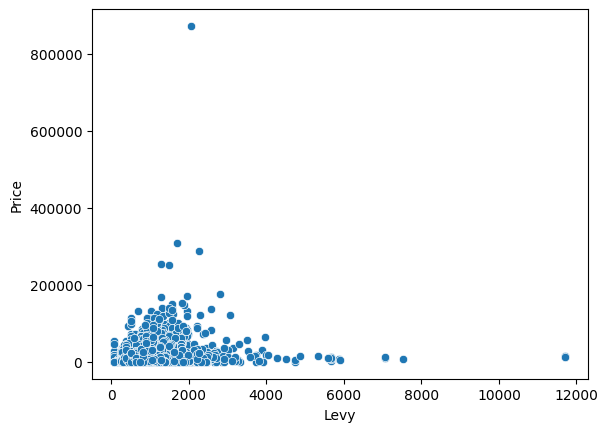

In [12]:
sns.scatterplot(data=df,x="Levy",y="Price")
plt.show()

In [13]:
df=df[df["Price"]<400000]

In [14]:
df=df[df["Levy"]<8000]

In [15]:
df=df[df["Price"]>100]

In [16]:
df["Mileage"].nunique()

6712

In [17]:
##remove the KM And Repalace it with nothing
df["Mileage"]=df["Mileage"].str.replace("km",'')

#convert Column type to numerical
df["Mileage"]=pd.to_numeric(df["Mileage"],errors='coerce')
#rename Mileage column
df.rename(columns = {'Mileage' : 'Mileage in KM'}, inplace = True)

In [18]:
df["Mileage in KM"]=df["Mileage in KM"]/1000

In [19]:
df["age"]=2023-df["Prod. year"]


Text(0.5, 1.0, 'Average Car Price by Year')

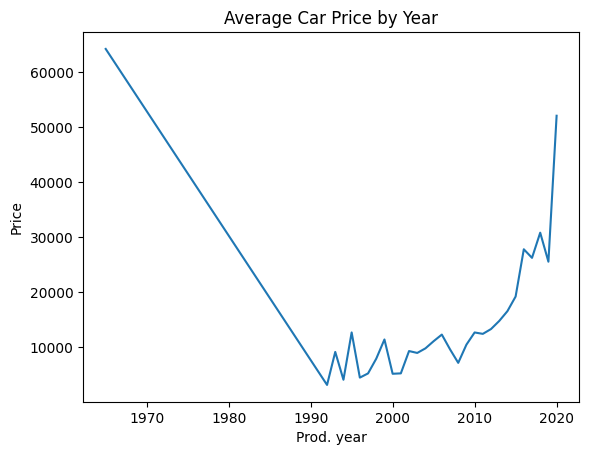

In [20]:
avg_year = df.groupby('Prod. year')["Price"].mean().reset_index()
sns.lineplot(x="Prod. year", y= "Price",data=avg_year)
plt.title('Average Car Price by Year')

In [21]:
df=df.drop(["Prod. year"],axis=1)

In [22]:
dict={
    "-Mar":'',
    "-May":'',
    ">":''
}
##remove the KM And Repalace it with nothing
df["Doors"]=df["Doors"].str.replace("-Mar",'')
df["Doors"]=df["Doors"].str.replace("-May",'')
df["Doors"]=df["Doors"].str.replace(">",'')

In [23]:
df["Doors"].unique()#convert Column type to numerical
df["Doors"]=pd.to_numeric(df["Doors"],errors='coerce')

In [24]:
df["Doors"].unique()

array([4, 2, 5], dtype=int64)

In [25]:
df.Category.value_counts()

Sedan          6259
Jeep           4206
Hatchback      1630
Minivan         357
Coupe           274
Universal       230
Goods wagon      74
Microbus         71
Pickup           21
Cabriolet        16
Name: Category, dtype: int64

Text(0.5, 1.0, 'Average Car Price by Category')

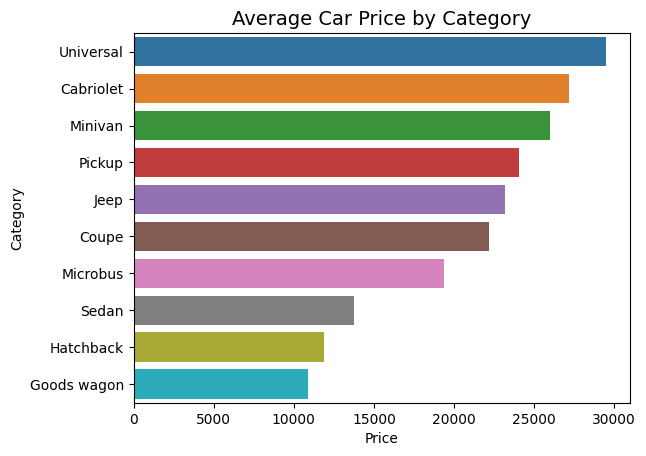

In [26]:
avg_Category = df.groupby('Category')["Price"].mean().reset_index()
avg_Category = avg_Category.sort_values(by="Price",ascending= False)
sns.barplot(y="Category", x= "Price",data=avg_Category)
plt.title('Average Car Price by Category', fontsize=14)

Text(0.5, 1.0, 'Distribution of Wheel Types')

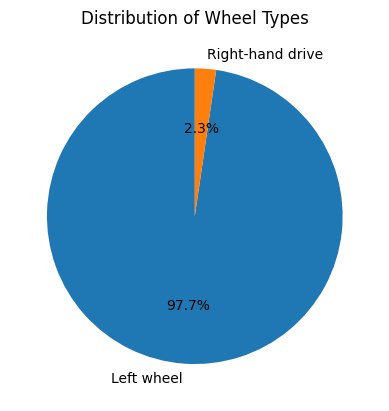

In [27]:
plt.pie(df["Wheel"].value_counts(), labels=df["Wheel"].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Wheel Types")

In [28]:
df["Manufacturer"].nunique()

47

In [29]:
df["Manufacturer"].str.upper()

0                LEXUS
1            CHEVROLET
3                 FORD
4                HONDA
5              HYUNDAI
             ...      
19231    MERCEDES-BENZ
19233          HYUNDAI
19234          HYUNDAI
19235        CHEVROLET
19236          HYUNDAI
Name: Manufacturer, Length: 13138, dtype: object

In [30]:
###### ADD COL Turbo TO SPLIT Engine volume  by there is turbo or not
df["Turbo"]=np.where(df["Engine volume"].str.contains("Turbo"), 'yes', 'no')

In [31]:
#remove Turbo string for Engine volume
df["Engine volume"]=df["Engine volume"].str.replace("Turbo",'')
df['Engine volume'] = pd.to_numeric(df['Engine volume'], errors='coerce')

In [32]:
print(df['Engine volume'].isnull().sum(), "missing values after conversion")

0 missing values after conversion


In [33]:
df["Engine volume"].dtype

dtype('float64')

In [34]:
df["Leather interior"].unique()

array(['Yes', 'No'], dtype=object)

In [35]:
df["Cylinders"].value_counts()

4.0     10317
6.0      2028
8.0       627
3.0        66
5.0        64
12.0       17
1.0         8
10.0        4
2.0         4
16.0        1
7.0         1
14.0        1
Name: Cylinders, dtype: int64

<AxesSubplot: xlabel='Cylinders', ylabel='Count'>

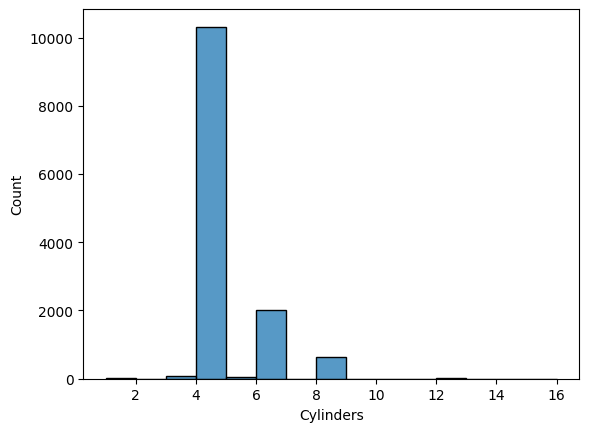

In [36]:
sns.histplot(df["Cylinders"])

In [37]:
df=df[df["Cylinders"]<=14]
df=df[df["Cylinders"]>=2]


In [38]:
df["Fuel type"].value_counts()

Petrol            6545
Diesel            3156
Hybrid            2732
LPG                637
Plug-in Hybrid      41
CNG                 18
Name: Fuel type, dtype: int64

Text(0.5, 1.0, 'Average Car Price by Fuel Type')

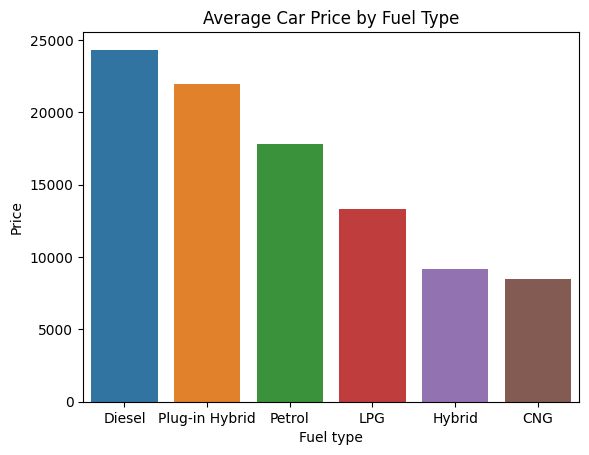

In [39]:
avg_Fuel_type = df.groupby('Fuel type')["Price"].mean().reset_index()
avg_Fuel_type = avg_Fuel_type.sort_values(by="Price",ascending= False)
sns.barplot(x="Fuel type", y= "Price",data=avg_Fuel_type)
plt.title('Average Car Price by Fuel Type')

C:\Users\1\AppData\Local\Temp\ipykernel_17396\941010651.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Price"])


<AxesSubplot: xlabel='Price', ylabel='Density'>

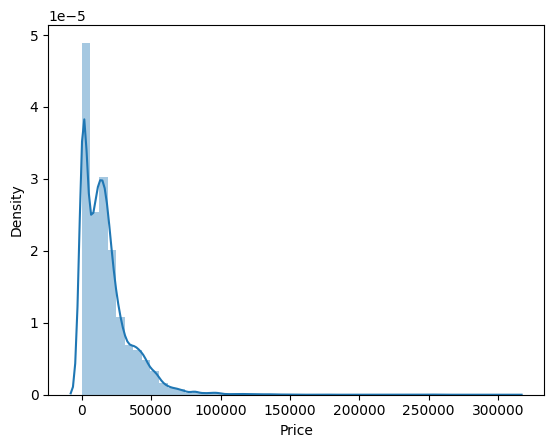

In [40]:
sns.distplot(df["Price"])

In [41]:
#handle outliers
df.describe()

,Price,Levy,Engine volume,Mileage in KM,Cylinders,Doors,Airbags,age
count,13129.000000,13129.000000,13129.000000,1.312900e+04,13129.000000,13129.000000,13129.000000,13129.000000
mean,17352.583974,904.076853,2.315203,3.778492e+02,4.512377,3.970447,6.869906,9.864955
std,17866.846689,434.003799,0.871735,2.067238e+04,1.110317,0.256917,4.457206,3.051927
min,110.000000,87.000000,0.000000,0.000000e+00,2.000000,2.000000,0.000000,3.000000
25%,3763.000000,640.000000,1.800000,6.807500e+01,4.000000,4.000000,4.000000,8.000000
50%,13771.000000,781.000000,2.000000,1.186560e+02,4.000000,4.000000,4.000000,10.000000
75%,23521.000000,1058.000000,2.500000,1.793750e+02,4.000000,4.000000,12.000000,12.000000
max,308906.000000,7536.000000,20.000000,2.147484e+06,14.000000,5.000000,16.000000,58.000000


Text(0.5, 1.0, 'Car Age Vs Car Price by Drive wheels')

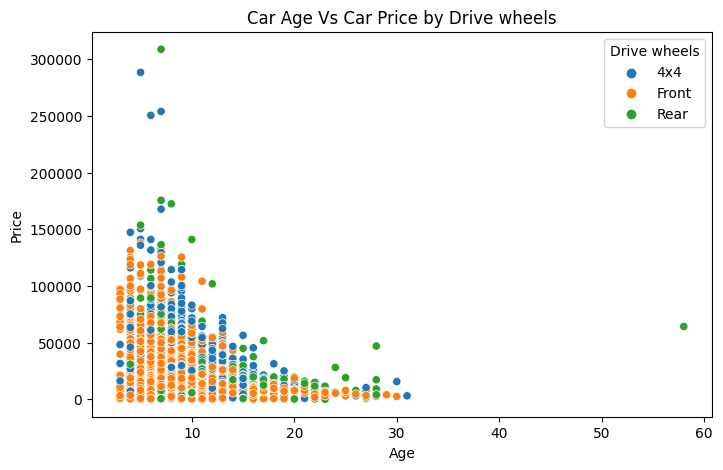

In [42]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='age', y='Price', hue='Drive wheels')
plt.xlabel('Age')
plt.ylabel('Price')
plt.title('Car Age Vs Car Price by Drive wheels')

In [43]:
df=df[df["age"]<30]

In [44]:
category_feature=[feature for feature in df.columns if df[feature].dtype=='O']
numeric_feature=[feature for feature in df.columns if df[feature].dtype!='O']


In [45]:
print(category_feature)
print(numeric_feature)

['Manufacturer', 'Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels', 'Wheel', 'Color', 'Turbo']
['Price', 'Levy', 'Engine volume', 'Mileage in KM', 'Cylinders', 'Doors', 'Airbags', 'age']


C:\Users\1\AppData\Local\Temp\ipykernel_17396\1684632841.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\1\AppData\Local\Temp\ipykernel_17396\1684632841.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\1\AppData\Local\Temp\ipykernel_17396\1684632841.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\1\AppData\Local\Temp\ipykernel_17396\1684632841.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\1\AppData\Local\Temp\ipykernel_17396\1684632841.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline

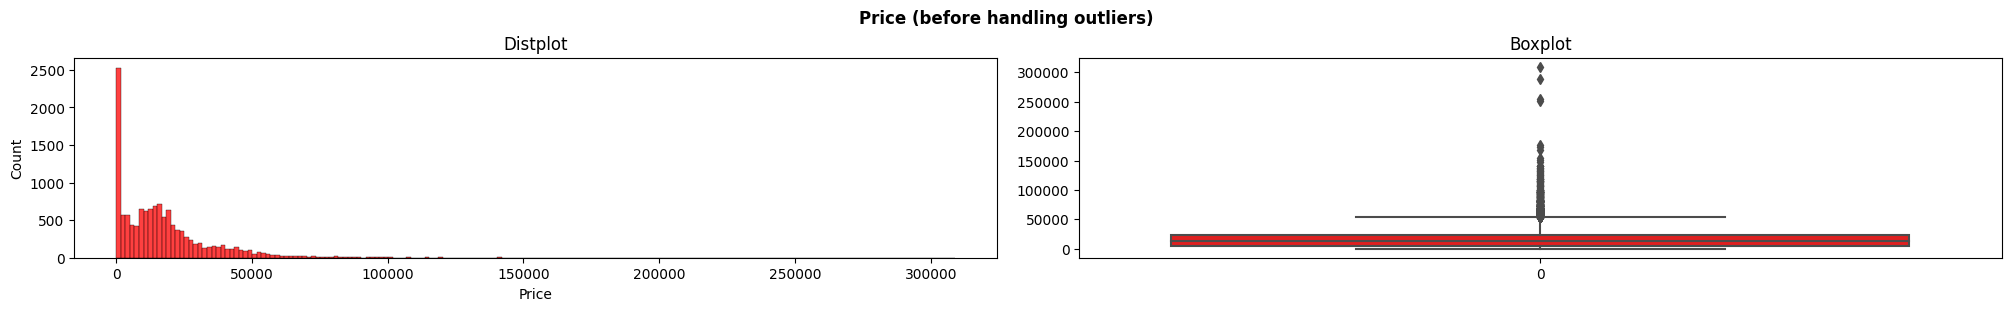

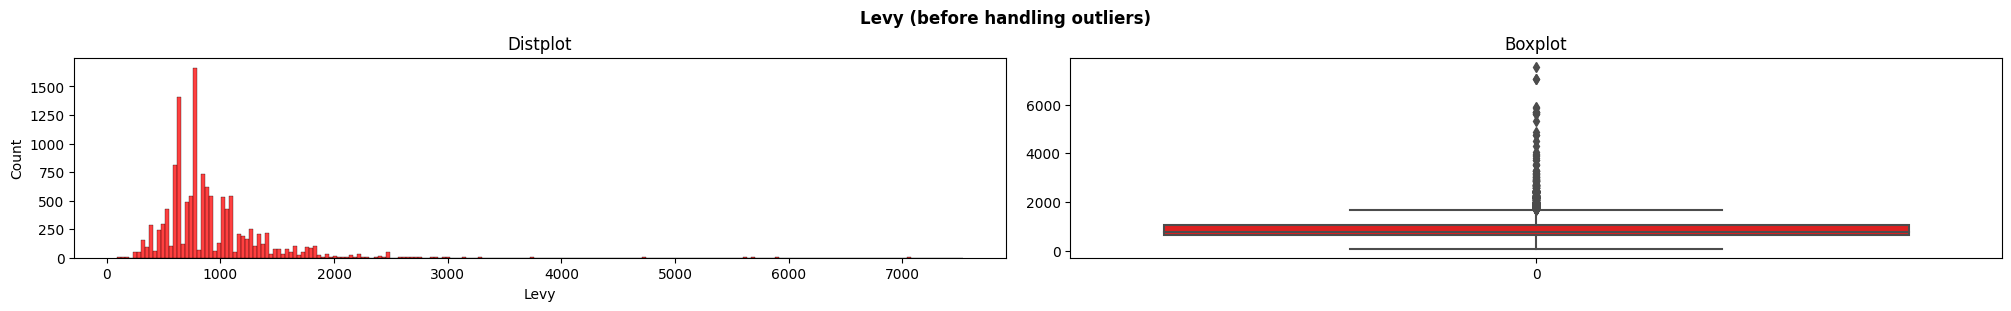

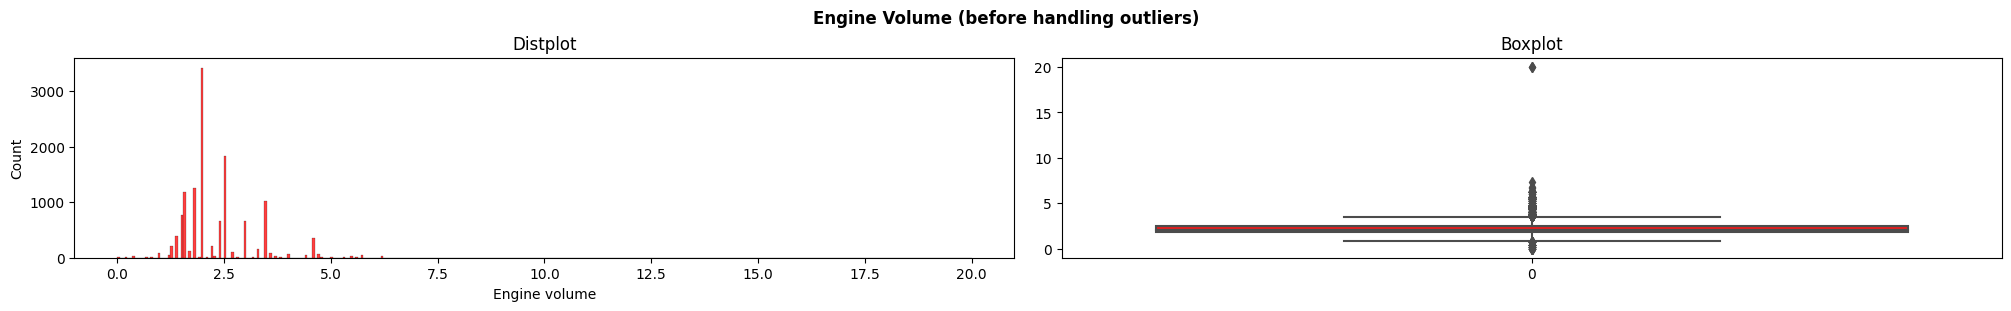

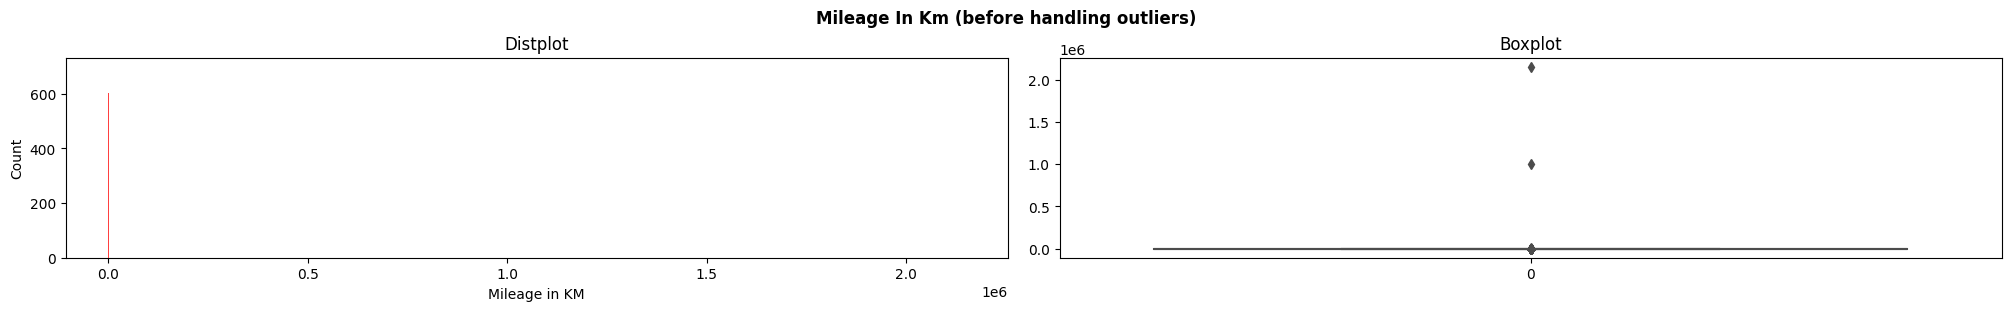

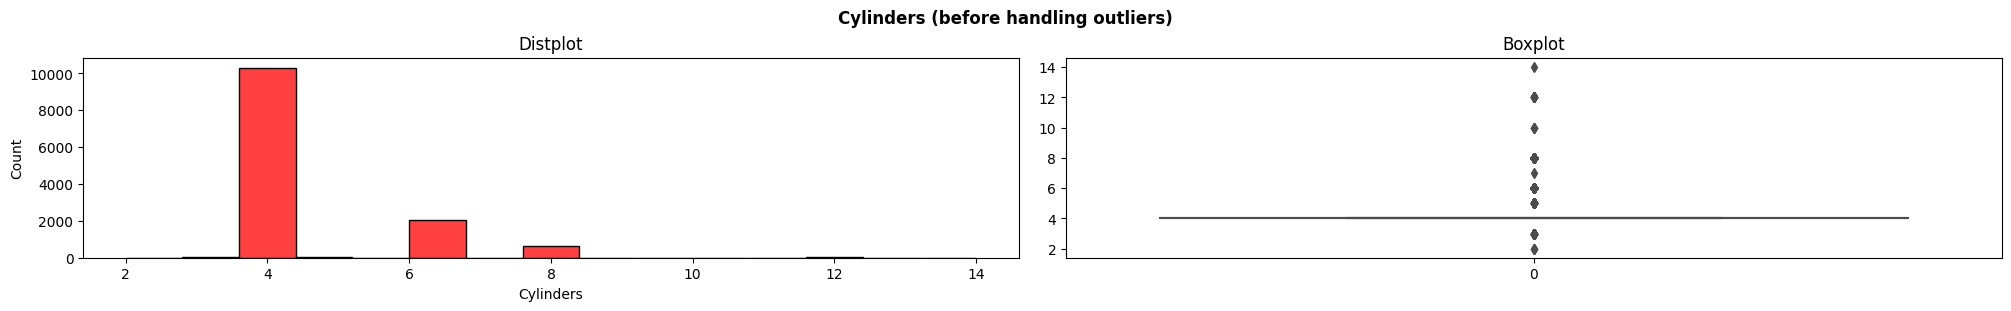

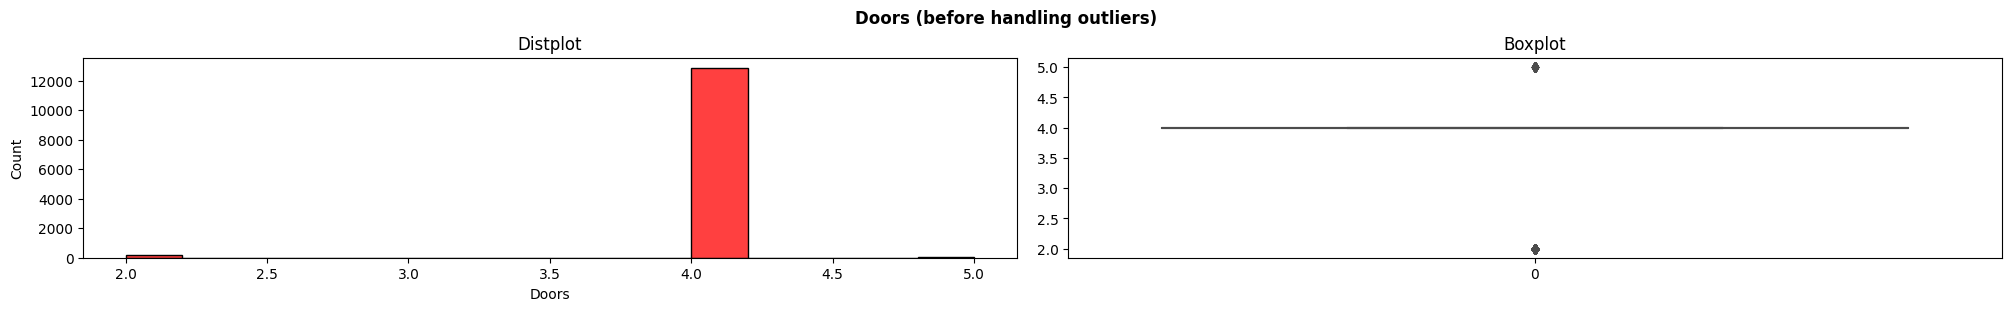

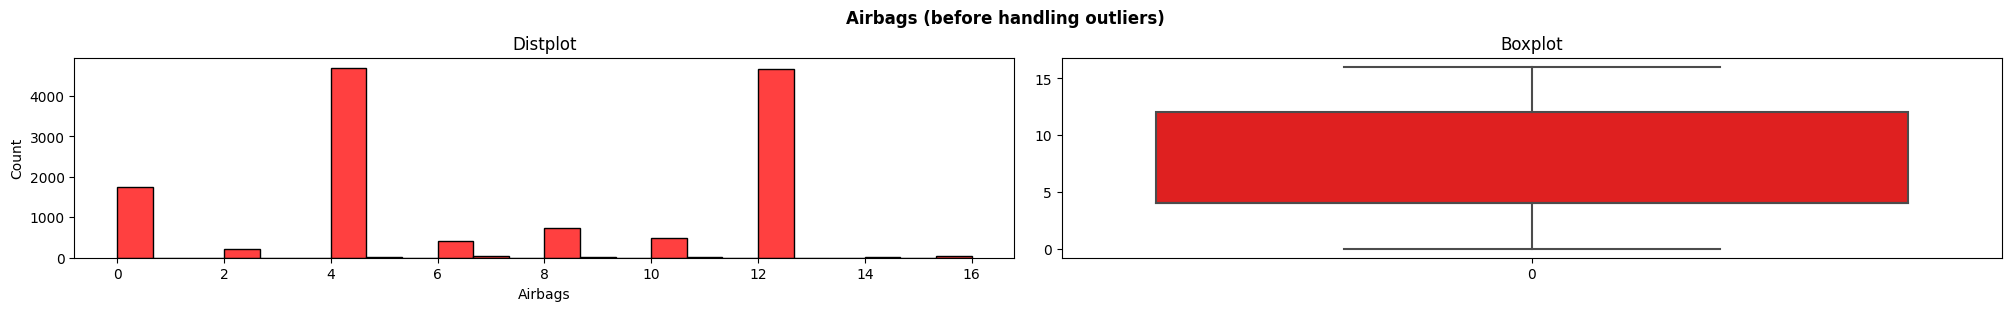

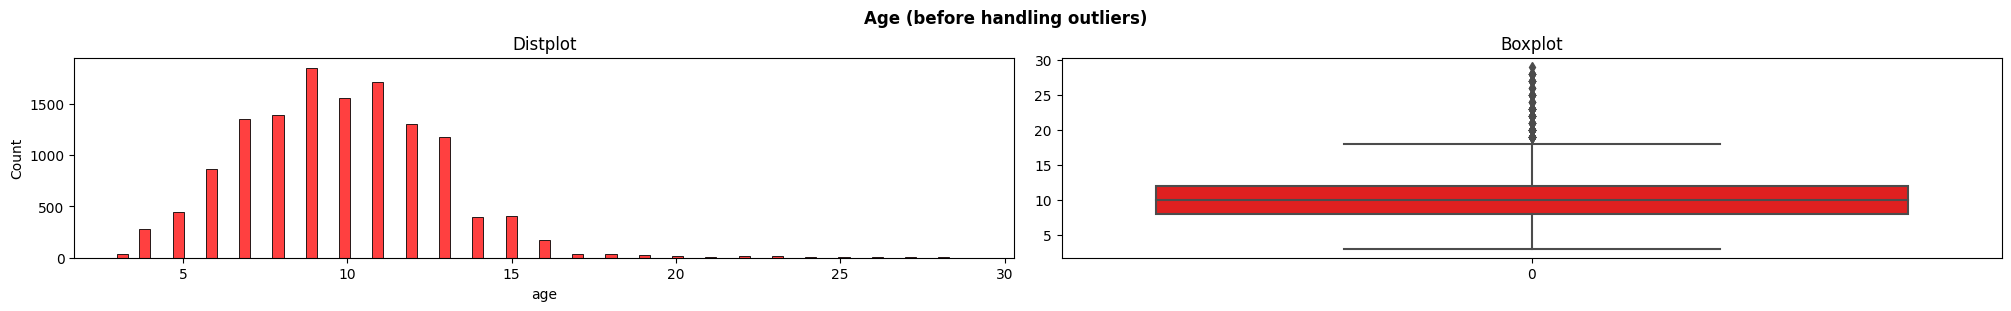

In [46]:
for col in numeric_feature:
    fig, ax =plt.subplots(1,2, constrained_layout=True)
    fig.set_size_inches(20, 3)
    sns.histplot(df[col], ax=ax[0],color='red').set(title="Distplot")
    sns.boxplot(df[col], ax=ax[1],color='red').set(title="Boxplot")
    plt.suptitle(f'{col.title()} (before handling outliers)',weight='bold')
    fig.show()

In [47]:
def outlier_prcnt(data, col_list):
    for col_name in col_list:
        q1 = data[col_name].quantile(0.25)
        q3 = data[col_name].quantile(0.75)
        iqr = q3-q1  #IQR
        fence_low  = q1-1.5*iqr
        fence_high = q3+1.5*iqr

        
        outliers = ((data[col_name] > fence_high) | (data[col_name] < fence_low)).sum()
        total = data[col_name].shape[0]
        print(f"Total outliers in {col_name} are: {outliers} - {round(100*(outliers)/total,2)}%.")


In [48]:
outlier_prcnt(df, numeric_feature)

Total outliers in Price are: 514 - 3.92%.
Total outliers in Levy are: 672 - 5.12%.
Total outliers in Engine volume are: 876 - 6.67%.
Total outliers in Mileage in KM are: 584 - 4.45%.
Total outliers in Cylinders are: 2809 - 21.4%.
Total outliers in Doors are: 244 - 1.86%.
Total outliers in Airbags are: 0 - 0.0%.
Total outliers in age are: 113 - 0.86%.


In [49]:
def outlier_handle(data, Num_col_list):
    df_new = data.copy()
    for col_name in Num_col_list:
        q1 = data[col_name].quantile(0.25)
        q3 = data[col_name].quantile(0.75)
        iqr = q3-q1  #IQR
        fence_low  = q1-1.5*iqr
        fence_high = q3+1.5*iqr
        df_new.loc[:,  col_name] = np.where(data[col_name]> fence_high, fence_high,
                                         np.where(data[col_name]< fence_low, fence_low,
                                                  data[col_name]
                                                 )
                                           )
    return df_new

In [50]:
df_no_outliers=outlier_handle(df,['Price', 'Levy', 'Mileage in KM', 'Doors', 'Airbags', 'age'])

C:\Users\1\AppData\Local\Temp\ipykernel_17396\17390422.py:9: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_new.loc[:,  col_name] = np.where(data[col_name]> fence_high, fence_high,


C:\Users\1\AppData\Local\Temp\ipykernel_17396\119560971.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\1\AppData\Local\Temp\ipykernel_17396\119560971.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\1\AppData\Local\Temp\ipykernel_17396\119560971.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\1\AppData\Local\Temp\ipykernel_17396\119560971.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\1\AppData\Local\Temp\ipykernel_17396\119560971.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.back

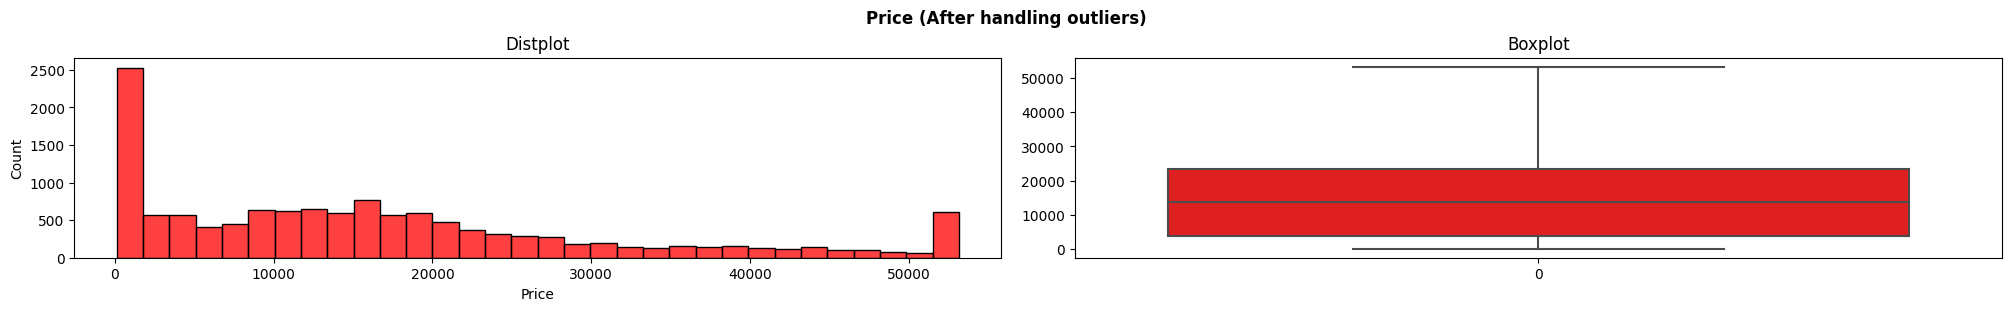

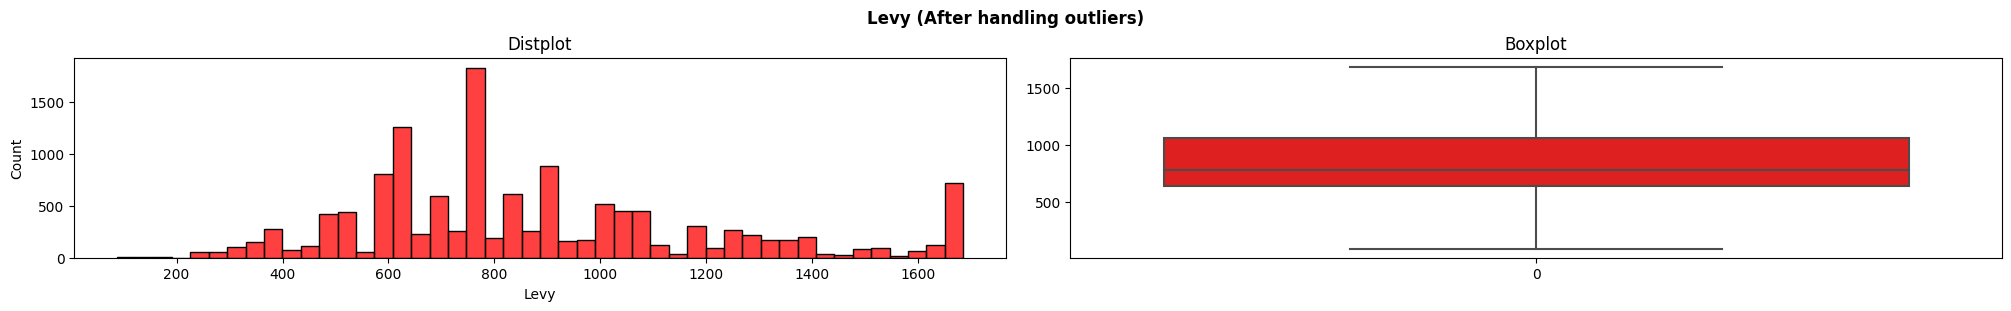

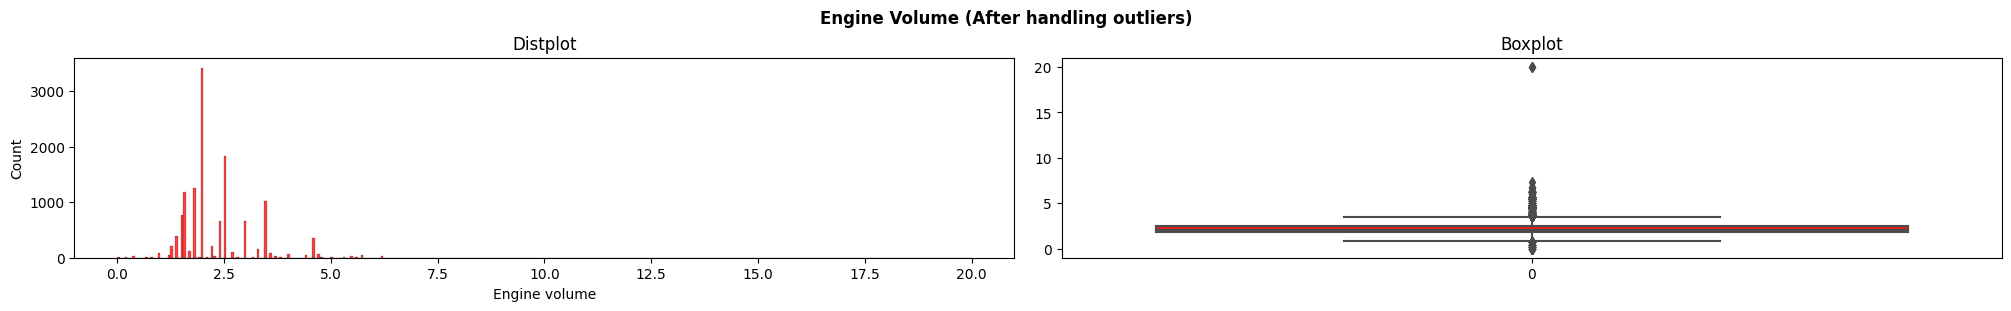

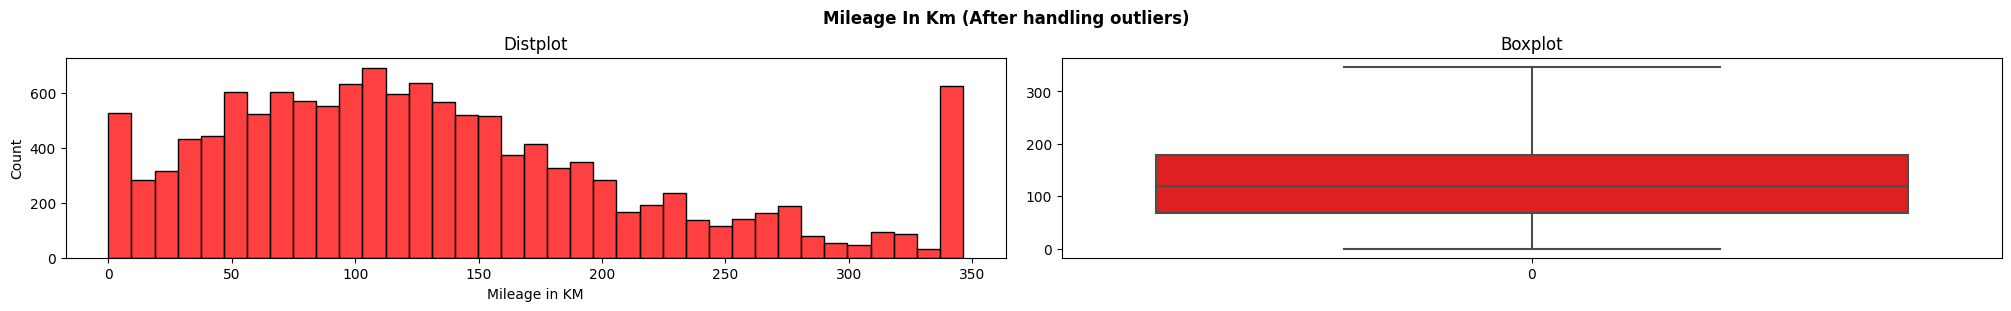

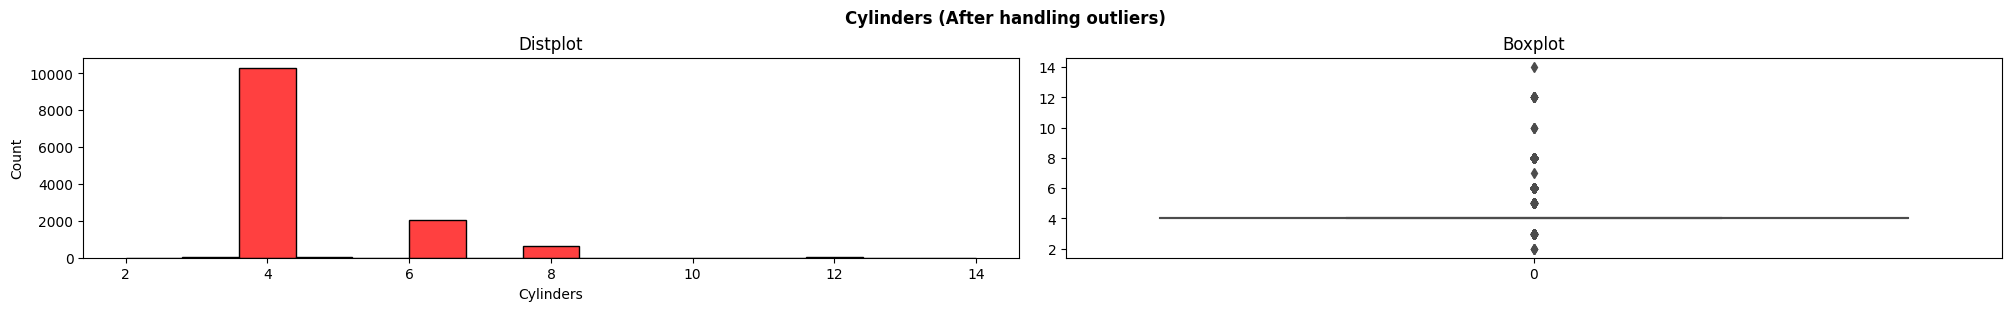

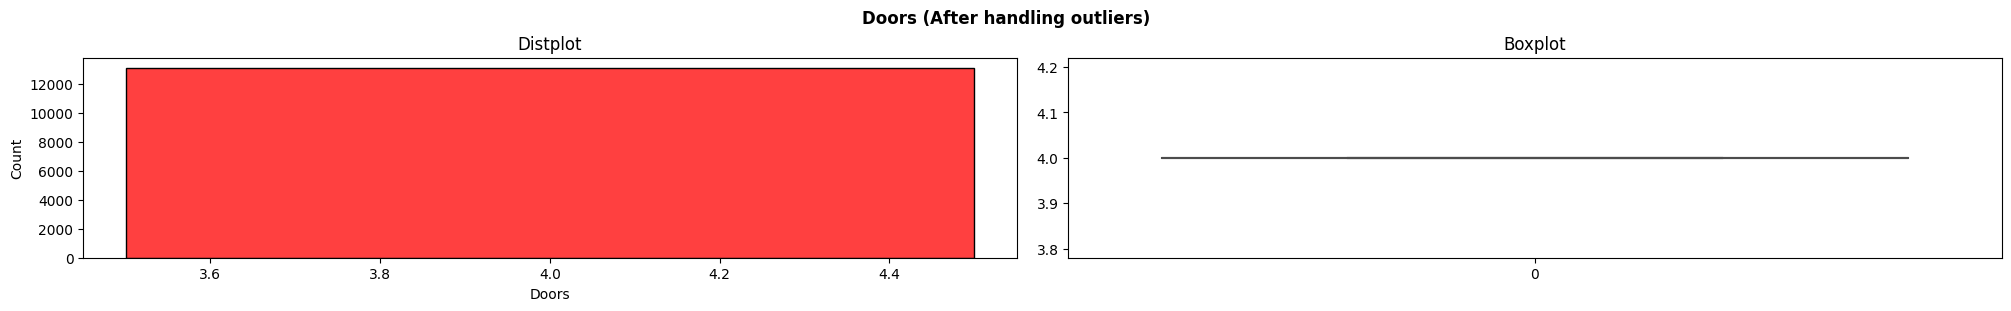

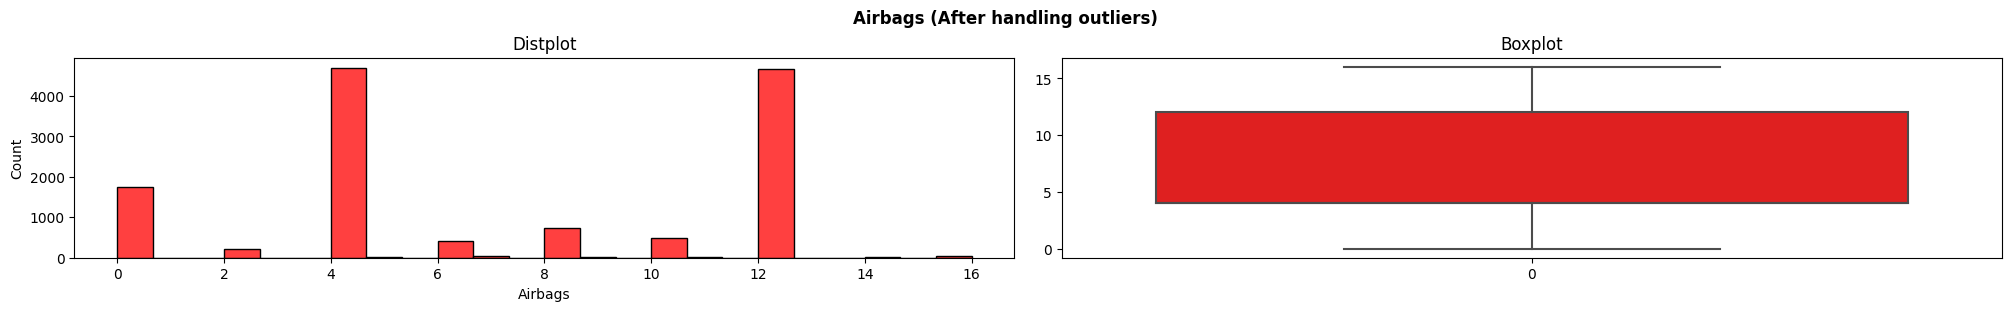

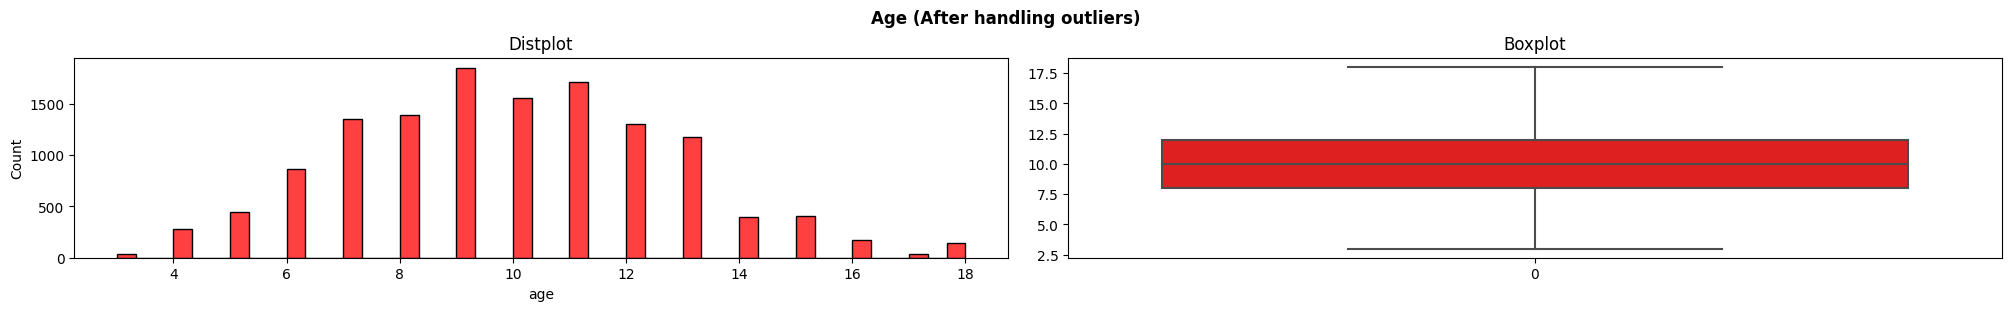

In [51]:
for col in numeric_feature:
    fig, ax =plt.subplots(1,2, constrained_layout=True)
    fig.set_size_inches(20, 3)
    sns.histplot(df_no_outliers[col], ax=ax[0],color='red').set(title="Distplot")
    sns.boxplot(df_no_outliers[col], ax=ax[1],color='red').set(title="Boxplot")
    plt.suptitle(f'{col.title()} (After handling outliers)',weight='bold')
    fig.show()

In [52]:
df_no_outliers.skew()

C:\Users\1\AppData\Local\Temp\ipykernel_17396\3461722929.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_no_outliers.skew()


Price            0.956093
Levy             0.785688
Engine volume    2.610123
Mileage in KM    0.775485
Cylinders        2.243292
Doors            0.000000
Airbags         -0.011719
age              0.224233
dtype: float64

C:\Users\1\AppData\Local\Temp\ipykernel_17396\2094094075.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='RdBu')


<AxesSubplot: >

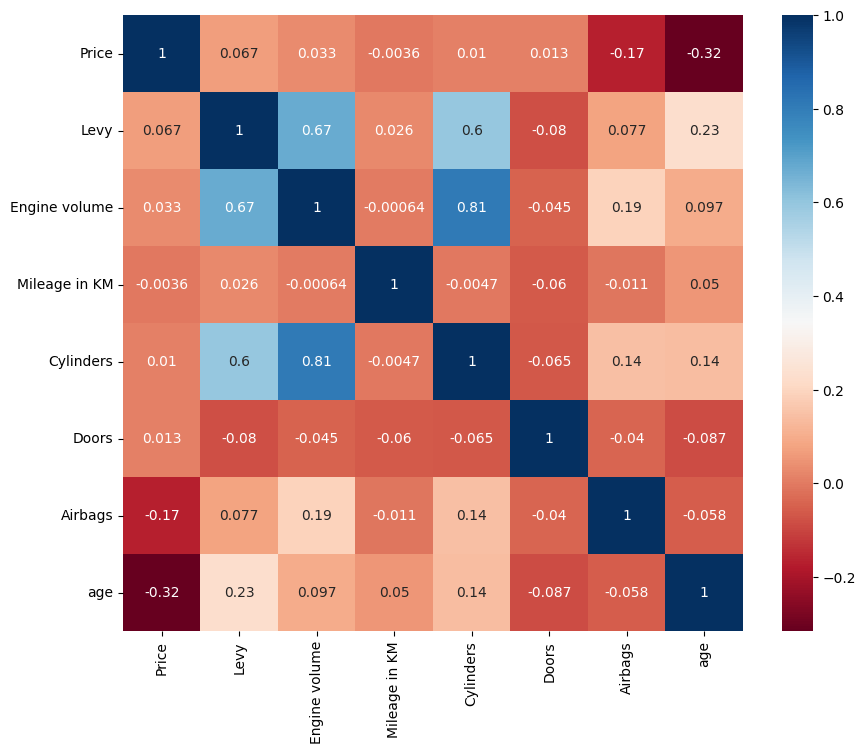

In [53]:
fig=plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='RdBu')

In [54]:
print(category_feature) 

['Manufacturer', 'Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels', 'Wheel', 'Color', 'Turbo']


#Feature engineering

In [57]:
df_no_outliers["Leather interior"]=df_no_outliers["Leather interior"].map({'Yes':1,'No':0})
df_no_outliers["Leather interior"]=pd.to_numeric(df_no_outliers["Leather interior"],errors='coerce')

In [58]:
df_no_outliers["Left_Handed_Wheel"]=df_no_outliers["Wheel"].map({"Left wheel":1,"Right-hand drive":0})

In [59]:
df_no_outliers["Left_Handed_Wheel"].unique()

array([1, 0], dtype=int64)

In [60]:
df_no_outliers= df_no_outliers.drop(["Wheel"],axis=1)

In [61]:
df_no_outliers.describe()

,Price,Levy,Leather interior,Engine volume,Mileage in KM,Cylinders,Doors,Airbags,age,Turbo,Left_Handed_Wheel
count,13125.000000,13125.000000,13125.000000,13125.000000,13125.000000,13125.000000,13125.0,13125.000000,13125.000000,13125.000000,13125.000000
mean,16565.456000,880.493410,0.855010,2.314773,132.742395,4.511771,4.0,6.870248,9.819200,0.057067,0.976838
std,14704.229519,339.125209,0.352105,0.871269,87.150220,1.109566,0.0,4.456707,2.863154,0.231979,0.150423
min,110.000000,87.000000,0.000000,0.000000,0.000000,2.000000,4.0,0.000000,3.000000,0.000000,0.000000
25%,3763.000000,640.000000,1.000000,1.800000,68.111000,4.000000,4.0,4.000000,8.000000,0.000000,1.000000
50%,13771.000000,781.000000,1.000000,2.000000,118.656000,4.000000,4.0,4.000000,10.000000,0.000000,1.000000
75%,23521.000000,1058.000000,1.000000,2.500000,179.375000,4.000000,4.0,12.000000,12.000000,0.000000,1.000000
max,53158.000000,1685.000000,1.000000,20.000000,346.271000,14.000000,4.0,16.000000,18.000000,1.000000,1.000000


In [62]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [63]:
'''1️⃣ Tiptronic – $$$$ (Most expensive)
 2️⃣ Automatic – $$$
 3️⃣ Variator (CVT) – $$
 4️⃣ Manual – $ (Least expensive)'''

'1️⃣ Tiptronic – $$$$ (Most expensive)\n 2️⃣ Automatic – $$$\n 3️⃣ Variator (CVT) – $$\n 4️⃣ Manual – $ (Least expensive)'

In [64]:
''' ['Manufacturer','Color' ==> Target Encoding with K fold

'Category', 'Fuel type', 'Drive wheels' ==> one hot encoding

'Gear box type', 'Wheel' ==> labelEncoding 

]'''

" ['Manufacturer','Color' ==> Target Encoding with K fold\n\n'Category', 'Fuel type', 'Drive wheels' ==> one hot encoding\n\n'Gear box type', 'Wheel' ==> labelEncoding \n\n]"

In [65]:
df["Gear box type"].unique()

array(['Automatic', 'Tiptronic', 'Manual', 'Variator'], dtype=object)

In [66]:
df_no_outliers["Manufacturer"].nunique()

47

In [67]:
df_no_outliers["Category"].nunique()

10

In [68]:
df_no_outliers["Fuel type"].unique()

array(['Hybrid', 'Petrol', 'Diesel', 'Plug-in Hybrid', 'LPG', 'CNG'],
      dtype=object)

In [69]:
df_no_outliers["Drive wheels"].unique()

array(['4x4', 'Front', 'Rear'], dtype=object)

In [70]:
df_no_outliers["Color"].nunique()

16

In [71]:
LE=LabelEncoder()

In [72]:
df_no_outliers["Gear box type"] = LE.fit_transform(df_no_outliers["Gear box type"])

In [73]:
df_encoded_Category = pd.get_dummies(data=df_no_outliers , columns=["Category"])

In [74]:
df_encoded_Ft = pd.get_dummies(data= df_encoded_Category , columns=["Fuel type"])

In [75]:
df_encoded_Dw = pd.get_dummies(data=df_encoded_Ft , columns=["Drive wheels"])

In [76]:
df_encoded_Dw

,Price,Levy,Manufacturer,Leather interior,Engine volume,Mileage in KM,Cylinders,Gear box type,Doors,Color,...,Category_Universal,Fuel type_CNG,Fuel type_Diesel,Fuel type_Hybrid,Fuel type_LPG,Fuel type_Petrol,Fuel type_Plug-in Hybrid,Drive wheels_4x4,Drive wheels_Front,Drive wheels_Rear
0,13328.0,1399.0,LEXUS,1,3.5,186.005,6.0,0,4.0,Silver,...,0,0,0,1,0,0,0,1,0,0
1,16621.0,1018.0,CHEVROLET,0,3.0,192.000,6.0,2,4.0,Black,...,0,0,0,0,0,1,0,1,0,0
3,3607.0,862.0,FORD,1,2.5,168.966,4.0,0,4.0,White,...,0,0,0,1,0,0,0,1,0,0
4,11726.0,446.0,HONDA,1,1.3,91.901,4.0,0,4.0,Silver,...,0,0,0,0,0,1,0,0,1,0
5,39493.0,891.0,HYUNDAI,1,2.0,160.931,4.0,0,4.0,White,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,5802.0,1055.0,MERCEDES-BENZ,1,3.5,107.800,6.0,0,4.0,Grey,...,0,0,1,0,0,0,0,0,0,1
19233,15681.0,831.0,HYUNDAI,1,2.4,161.600,4.0,2,4.0,Red,...,0,0,0,0,0,1,0,0,1,0
19234,26108.0,836.0,HYUNDAI,1,2.0,116.365,4.0,0,4.0,Grey,...,0,0,1,0,0,0,0,0,1,0
19235,5331.0,1288.0,CHEVROLET,1,2.0,51.258,4.0,0,4.0,Black,...,0,0,1,0,0,0,0,0,1,0


In [77]:
from category_encoders import TargetEncoder

In [78]:
TE=TargetEncoder()

In [79]:
df_encoded_Dw["encode_Manufacturer"] = TE.fit_transform(df_encoded_Dw["Manufacturer"],df_encoded_Dw["Price"])

In [80]:
df_encoded_Dw["encode_Manufacturer"].nunique()

46

In [81]:
df_encoded_Color = pd.get_dummies(data=df_encoded_Dw , columns=["Color"])

In [82]:
df_encoded_Color

,Price,Levy,Manufacturer,Leather interior,Engine volume,Mileage in KM,Cylinders,Gear box type,Doors,Airbags,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,13328.0,1399.0,LEXUS,1,3.5,186.005,6.0,0,4.0,12.0,...,0,0,0,0,0,0,1,0,0,0
1,16621.0,1018.0,CHEVROLET,0,3.0,192.000,6.0,2,4.0,8.0,...,0,0,0,0,0,0,0,0,0,0
3,3607.0,862.0,FORD,1,2.5,168.966,4.0,0,4.0,0.0,...,0,0,0,0,0,0,0,0,1,0
4,11726.0,446.0,HONDA,1,1.3,91.901,4.0,0,4.0,4.0,...,0,0,0,0,0,0,1,0,0,0
5,39493.0,891.0,HYUNDAI,1,2.0,160.931,4.0,0,4.0,4.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,5802.0,1055.0,MERCEDES-BENZ,1,3.5,107.800,6.0,0,4.0,12.0,...,0,1,0,0,0,0,0,0,0,0
19233,15681.0,831.0,HYUNDAI,1,2.4,161.600,4.0,2,4.0,8.0,...,0,0,0,0,0,1,0,0,0,0
19234,26108.0,836.0,HYUNDAI,1,2.0,116.365,4.0,0,4.0,4.0,...,0,1,0,0,0,0,0,0,0,0
19235,5331.0,1288.0,CHEVROLET,1,2.0,51.258,4.0,0,4.0,4.0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
encode_df = df_encoded_Color.drop(["Manufacturer"],axis=1)

In [84]:
encode_df

,Price,Levy,Leather interior,Engine volume,Mileage in KM,Cylinders,Gear box type,Doors,Airbags,age,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,13328.0,1399.0,1,3.5,186.005,6.0,0,4.0,12.0,13.0,...,0,0,0,0,0,0,1,0,0,0
1,16621.0,1018.0,0,3.0,192.000,6.0,2,4.0,8.0,12.0,...,0,0,0,0,0,0,0,0,0,0
3,3607.0,862.0,1,2.5,168.966,4.0,0,4.0,0.0,12.0,...,0,0,0,0,0,0,0,0,1,0
4,11726.0,446.0,1,1.3,91.901,4.0,0,4.0,4.0,9.0,...,0,0,0,0,0,0,1,0,0,0
5,39493.0,891.0,1,2.0,160.931,4.0,0,4.0,4.0,7.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,5802.0,1055.0,1,3.5,107.800,6.0,0,4.0,12.0,10.0,...,0,1,0,0,0,0,0,0,0,0
19233,15681.0,831.0,1,2.4,161.600,4.0,2,4.0,8.0,12.0,...,0,0,0,0,0,1,0,0,0,0
19234,26108.0,836.0,1,2.0,116.365,4.0,0,4.0,4.0,13.0,...,0,1,0,0,0,0,0,0,0,0
19235,5331.0,1288.0,1,2.0,51.258,4.0,0,4.0,4.0,16.0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
Y=encode_df["Price"]
X=encode_df.drop(["Price"],axis=1)

In [86]:
X.shape

(13125, 47)

In [87]:
Y.shape

(13125,)

In [88]:
from math import sqrt
from sklearn.metrics import mean_squared_error,r2_score 
from sklearn.preprocessing import MinMaxScaler

In [89]:
MS = MinMaxScaler()

In [90]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y, test_size = 0.2, random_state = 25,shuffle = True)

In [91]:
X_train=MS.fit_transform(X_train)
X_test= MS.transform(X_test)

In [92]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()

In [93]:
Model=LR.fit(X_train, Y_train)

In [94]:
Y_pred= LR.predict(X_test)

In [95]:
print(" Accuracy of Train dataset: ",Model.score(X_train,Y_train))
print(" Accuracy of Test dataset: ",Model.score(X_test,Y_test))

 Accuracy of Train dataset:  0.42115848407912904
 Accuracy of Test dataset:  0.4142033498611254


In [96]:

MSE= round(mean_squared_error(Y_test, Y_pred), 3)
RMSE = round(sqrt(MSE), 3)

r2_value = round(r2_score(Y_test, Y_pred), 3)
print('Root mean square error ')
print('R-squared value of the model is : {}'.format(r2_value))


Root mean square error 
R-squared value of the model is : 0.414


In [97]:
from sklearn.ensemble import RandomForestRegressor
RF= RandomForestRegressor()

In [98]:
model=RF.fit(X_train, Y_train)

In [99]:
print(" Accuracy of Train dataset: ",model.score(X_train,Y_train))
print(" Accuracy of Test dataset: ",model.score(X_test,Y_test))

 Accuracy of Train dataset:  0.9586928746534303
 Accuracy of Test dataset:  0.8046361825781357


In [100]:
y_pred = model.predict(X_test)

In [101]:
MSE= round(mean_squared_error(Y_test, y_pred), 3)
RMSE = round(sqrt(MSE), 3)
r2_value = round(r2_score(Y_test, y_pred), 3)
print('Root Mean Squared Error of the model is : {}'.format(RMSE))
print('R-squared value of the model is : {}'.format(r2_value))

Root Mean Squared Error of the model is : 6443.378
R-squared value of the model is : 0.805
